# 1. Defining the Question


a) Specifying the questions


> Building a predictive model to determine if a building will have an insurance claim during a certain period or not.





b) Metric of success


> regression



c) Understanding the context


> There has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.




d) Recording the Experimental Data


*  Data Cleaning 
*  EDA
*  Modelling



# 2. Reading the Data

In [342]:
# importing the prerequisities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Loading the Data

In [343]:
# loading the datasets
train = pd.read_csv("/content/train_data.csv")
test = pd.read_csv("/content/test_data.csv") 
sample = pd.read_csv("/content/sample_submission.csv")
variabledescription = pd.read_csv("/content/VariableDescription.csv")

# 4. Understanding the Dataset

In [344]:
# previewing the variable description dataset
print(variabledescription)

              Variable                                        Description
0          Customer Id        Identification number for the Policy holder
1    YearOfObservation         year of observation for the insured policy
2       Insured_Period  duration of insurance policy in Olusola Insura...
3          Residential      is the building a residential building or not
4     Building_Painted  is the building painted or not (N-Painted, V-N...
5      Building_Fenced  is the building fence or not (N-Fenced, V-Not ...
6               Garden  building has garden or not (V-has garden; O-no...
7           Settlement  Area where the building is located. (R- rural ...
8   Building Dimension                 Size of the insured building in m2
9        Building_Type             The type of building (Type 1, 2, 3, 4)
10   Date_of_Occupancy                   date building was first occupied
11     NumberOfWindows                  number of windows in the building
12            Geo Code          Geogra

In [345]:
# checking for the number of records in the train and test datasets
print(train.shape)
print("*"*100)
test.shape

(7160, 14)
****************************************************************************************************


(3069, 13)

In [346]:
# previewing the top train  datasets
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [347]:
# previewing the top of test dataset
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [348]:
# previewing the bottom of both train and test datasets
print(train.tail())
print('*'*100)
test.tail()

     Customer Id  YearOfObservation  ...  Geo_Code  Claim
7155       H5290               2012  ...       NaN      0
7156       H5926               2013  ...       NaN      1
7157       H6204               2016  ...       NaN      0
7158       H6537               2013  ...       NaN      0
7159       H7470               2014  ...       NaN      0

[5 rows x 14 columns]
****************************************************************************************************


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
3064,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN
3068,H9021,2012,1.0,0,V,V,V,U,NaN,2,1950.0,.,NaN


In [349]:
# checking the summary of both train and test datasets
print(train.info())
print("*"*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB
None
****************************************

In [350]:
# previewing the sample submission dataset
sample.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


# 5. Data Cleaning

In [351]:
# standardizing the column names of train dataset
train.columns = train.columns.str.lower().str.replace('_','').str.replace(' ','')
train.columns

Index(['customerid', 'yearofobservation', 'insuredperiod', 'residential',
       'buildingpainted', 'buildingfenced', 'garden', 'settlement',
       'buildingdimension', 'buildingtype', 'dateofoccupancy',
       'numberofwindows', 'geocode', 'claim'],
      dtype='object')

In [352]:
# standardizing the column names of test dataset
test.columns = test.columns.str.lower().str.replace('_','').str.replace(' ','')
test.columns

Index(['customerid', 'yearofobservation', 'insuredperiod', 'residential',
       'buildingpainted', 'buildingfenced', 'garden', 'settlement',
       'buildingdimension', 'buildingtype', 'dateofoccupancy',
       'numberofwindows', 'geocode'],
      dtype='object')

In [353]:
# checking for missing values in both datasets
print(train.isnull().sum().sum())
print('*'*100)
test.isnull().sum().sum()

723
****************************************************************************************************


758

The train dataset has 723 missing values while test dataset has 758. 

In [354]:
# checking the variables with missing values in the train dataset
train.isnull().sum()

customerid             0
yearofobservation      0
insuredperiod          0
residential            0
buildingpainted        0
buildingfenced         0
garden                 7
settlement             0
buildingdimension    106
buildingtype           0
dateofoccupancy      508
numberofwindows        0
geocode              102
claim                  0
dtype: int64

the following variables have the indicated missing values:-


*   Garden, 7
*   Building Dimension, 106
*   Date of Occupancy, 508
*   Geo Code, 102


## 5.1 Handling the missing values in the train dataset

In [355]:
# the missing data look like its MCAR. So I am going to imputing the garden variable 
# the missing vales with the mode for the missing values are not a lot. 
train.garden.fillna(train.garden.mode(), inplace=True )

In [356]:
# dropping the rows with null values in the building dimension variable 
# because, if I impute using mean or median, data will be biased
train.buildingdimension.dropna(inplace=True)

In [357]:
train.geocode.fillna(train.geocode.mode(), inplace=True)

In [358]:
# droppping duplicates
print(train.duplicated().sum())
print('*'*100)
test.duplicated().sum()

0
****************************************************************************************************


0

there are no dupicates in both data sets

# 6. Exploratory Data Analysis



## 6.1 Univariate Data Analysis 

Text(0, 0.5, 'Counts')

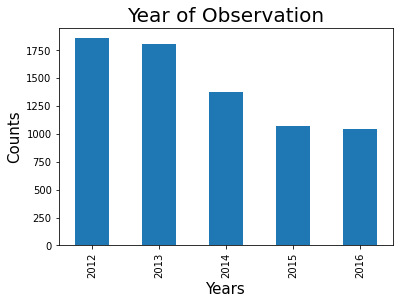

In [359]:
# visualisation for the year of observation variable
train.yearofobservation.value_counts().plot.bar()
plt.title('Year of Observation', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Counts', fontsize=15)

most of the observations recorded was on the year 2012

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


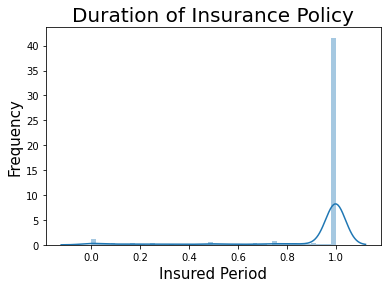

In [360]:
# duration of the insuarance period 
sns.distplot(train.insuredperiod, kde='false')
plt.title('Duration of Insurance Policy', fontsize=20)
plt.xlabel('Insured Period', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

a full year insurance policy duration was given in Olusola Insurance

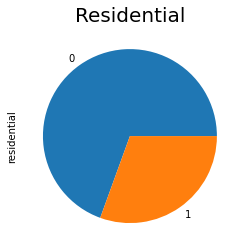

In [361]:
# are the buildings residential or not?
train.residential.value_counts().plot.pie()
plt.title('Residential', fontsize=20)
plt.show()

most of the buildings are not residential

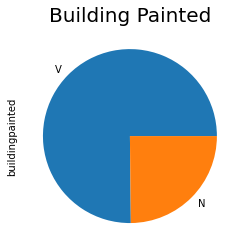

In [362]:
# are the buildings painted?
train.buildingpainted.value_counts().plot.pie()
plt.title('Building Painted', fontsize=20)
plt.show()

most of the buildings are not painted

N    3608
V    3552
Name: buildingfenced, dtype: int64

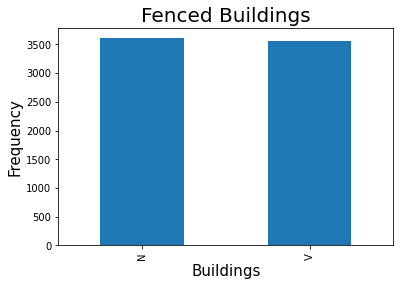

In [363]:
# are the buildings fenced?
ax = train.buildingfenced.value_counts().plot.bar()
plt.title('Fenced Buildings', fontsize=20)
plt.xlabel('Buildings', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

train.buildingfenced.value_counts()

more buildings are fenced

O    3602
V    3551
Name: garden, dtype: int64

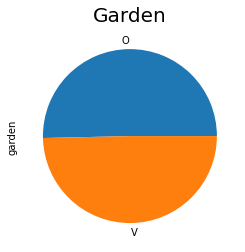

In [364]:
# does the building has a garden or not?
ax = train.garden.value_counts().plot.pie()
plt.title('Garden', fontsize=20)
train.garden.value_counts()


there are slightly more buildings without gardens than those with gardens.

R    3610
U    3550
Name: settlement, dtype: int64

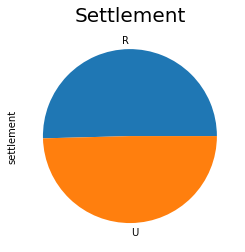

In [365]:
# The area where the building is located. 
ax = train.settlement.value_counts().plot.pie()
plt.title('Settlement', fontsize=20)

train.settlement.value_counts()

most of the buildings are located in the rural areas than the urban area.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


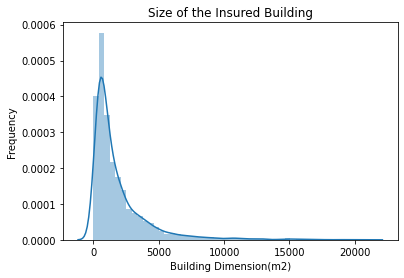

In [366]:
# size of insured buildings
sns.distplot(train.buildingdimension)
plt.title('Size of the Insured Building')
plt.xlabel('Building Dimension(m2)')
plt.ylabel('Frequency')
plt.show()

ths sizeof buildings is mostly distributed between 0 and 2,500 m2

Text(0, 0.5, 'Frequency')

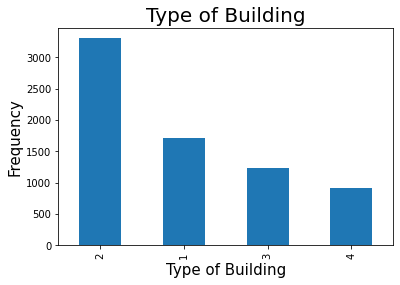

In [367]:
# type of buildings
train.buildingtype.value_counts().plot.bar()
plt.title("Type of Building", fontsize=20)
plt.xlabel("Type of Building", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

type 2 of the buildings is the most frequently insured.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


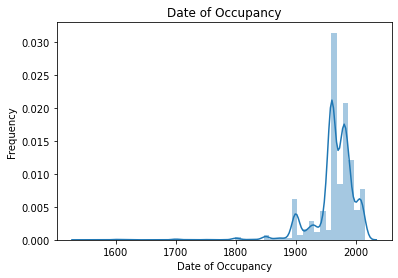

In [368]:
# the date when the building was first occupied
sns.distplot(train.dateofoccupancy)
plt.title('Date of Occupancy')
plt.xlabel('Date of Occupancy')
plt.ylabel('Frequency')
plt.show()

most of the buildings were occupied in 1950 to 2000

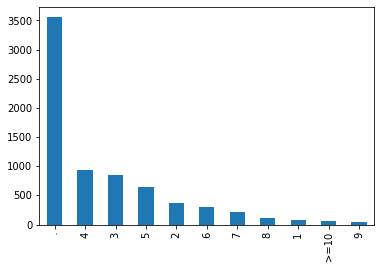

In [369]:
train.numberofwindows.value_counts().plot.bar()

there is a high number of null values

In [370]:
train.geocode


0       1053
1       1053
2       1053
3       1053
4       1053
        ... 
7155     NaN
7156     NaN
7157     NaN
7158     NaN
7159     NaN
Name: geocode, Length: 7160, dtype: object

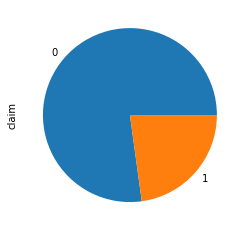

In [371]:
train.claim.value_counts().plot.pie()

there are no claims in most cases.

## 6.2 Bivariate Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


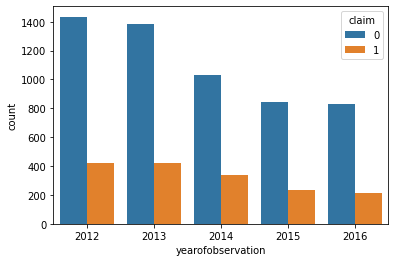

In [372]:
sns.countplot('yearofobservation', hue='claim', data=train)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


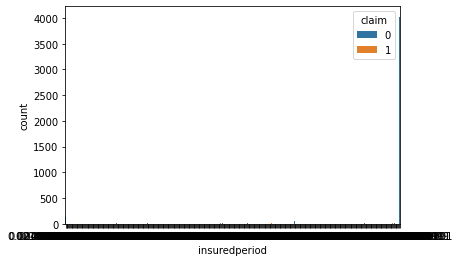

In [373]:
sns.barplot(x=train.claim, y=train.insuredperiod)
sns.countplot('insuredperiod', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


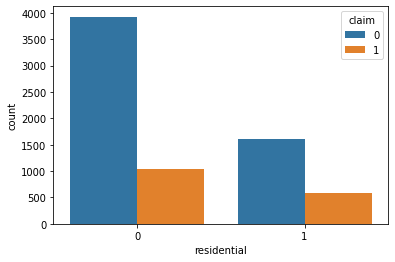

In [374]:
sns.barplot(x=train.claim, y=train.residential)
sns.countplot('residential', hue='claim', data=train)

In [375]:
train.dtypes

customerid            object
yearofobservation      int64
insuredperiod        float64
residential            int64
buildingpainted       object
buildingfenced        object
garden                object
settlement            object
buildingdimension    float64
buildingtype           int64
dateofoccupancy      float64
numberofwindows       object
geocode               object
claim                  int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


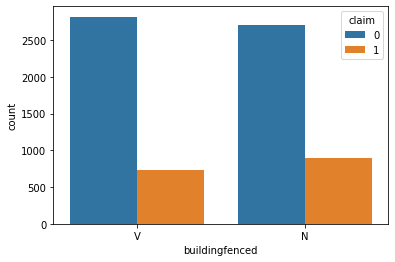

In [376]:

sns.countplot('buildingfenced', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


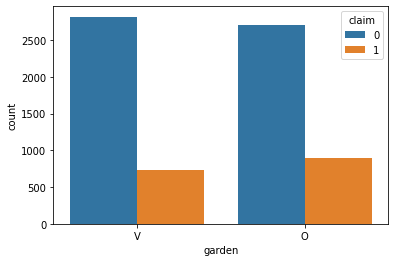

In [377]:
sns.countplot('garden', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


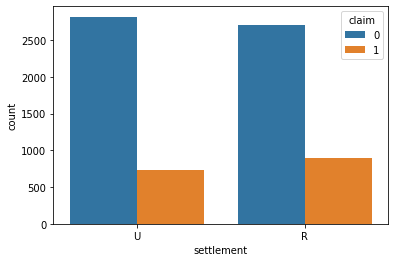

In [378]:
sns.countplot('settlement', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


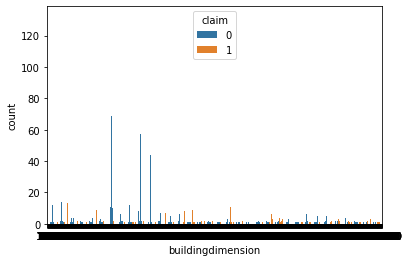

In [379]:
sns.countplot('buildingdimension', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


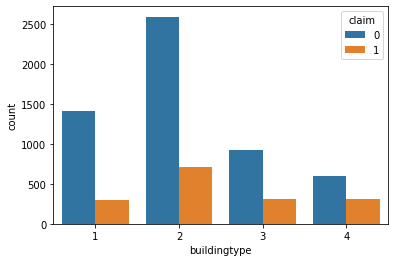

In [380]:

sns.countplot('buildingtype', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


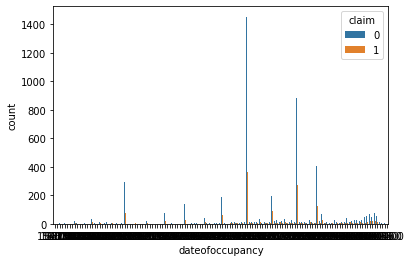

In [381]:
sns.countplot('dateofoccupancy', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


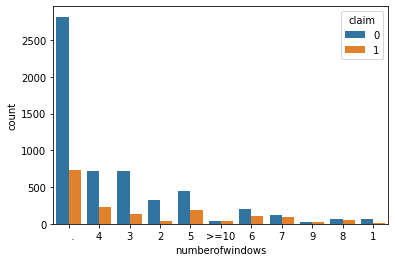

In [382]:
sns.countplot('numberofwindows', hue='claim', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


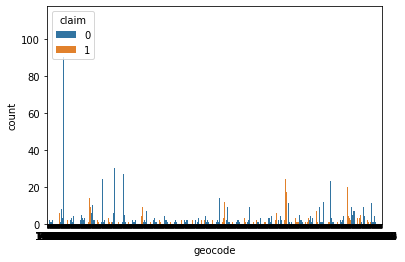

In [383]:
sns.countplot('geocode', hue='claim', data=train)

# 7. Machine Learning

In [386]:
# splitting the data
X = train.iloc[:,-1].values.reshape(-1, 1)
y = train.iloc[:, :-1]

In [387]:
# splitting the data for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)